In [61]:
#
#  Version 2.5 [ adds USA STATE -> City -> Location ]
#

import geonamescache
import pandas as pd

from unidecode import unidecode 

gc = geonamescache.GeonamesCache()

data = pd.read_csv(r'solution.csv')
cities = gc.get_cities().items()

countries = [ item for key, item in gc.get_countries_by_names().items()]


def get_country(name): 
    return [ item for item in countries if not isinstance(name , float) and unidecode(item.get("name")).lower() == name.lower()]

def get_cities_data(name):
    return [ value for key, value in cities if not isinstance(name , float) and unidecode(value.get("name")).lower() == name.lower()]

def get_city_high_population(city_items):
    maxPopulation = 0
    result = None
    for item in city_items:
        if maxPopulation < item.get("population"):
            result = item
            maxPopulation = item.get("population")
    return result
        

colLongitude = []
colLatitude = []
colCountryCode = []
counter_none = 0
counter = 0

for idx, row in data.iterrows():
    if not isinstance(row['cities'] , float):
        
        inner_cities = row["cities"].split(",")
        country_countryCodes = [item.get("iso") for item in get_country(row["countries"])]

        helper = []
        for city in inner_cities:
            city_items = get_cities_data(city.strip())
            if len(city_items) == 1:
                helper = city_items
                break
            elif len(city_items) > 1:
                helper =  helper + city_items
                    
        max_population_city = get_city_high_population(helper)
        
        if len(country_countryCodes) > 0:
            if max_population_city.get("countrycode") != country_countryCodes[0]:
                print("NO MATCH", max_population_city.get("countrycode") , country_countryCodes[0])
                print(row["headline"])
        elif len(country_countryCodes) > 1:
            print("PROBLEM", country_countryCodes)
            
        if max_population_city != None:           
            colLongitude.append(max_population_city.get("longitude"))
            colLatitude.append(max_population_city.get("latitude"))
            colCountryCode.append(max_population_city.get("countrycode"))
        else:
            colLongitude.append(None)
            colLatitude.append(None)
            colCountryCode.append(None)
        
        counter = counter + 1
    else:
        colLongitude.append(None)
        colLatitude.append(None)
        colCountryCode.append(None)
        counter_none = counter_none + 1
        # print("NO CITY ", row["countries"])

data["longitude"] = colLongitude;
data["latitude"] = colLatitude;
data["countrycode"] = colCountryCode;
print(data.head(10))
print(counter, ' --- ', counter_none)
data.to_csv(r'solution_2.csv', index=False)

                                  headline countries                cities  \
0   Zika New York City Outbreak Hits Miami       NaN  New York City, Miami   
1          Could Zika Reach New York City?       NaN         New York City   
2        First Case of Zika in Miami Beach       NaN           Miami Beach   
3  Mystery Virus Spreads in Recife, Brazil    Brazil                Recife   
4  Dallas man comes down with case of Zika       NaN                Dallas   
5        Trinidad confirms first Zika case       NaN              Trinidad   
6   Zika Concerns are Spreading in Houston       NaN               Houston   
7    Geneve Scientists Battle to Find Cure       NaN                Geneve   
8    The CDC in Atlanta is Growing Worried       NaN               Atlanta   
9       Zika Infested Monkeys in Sao Paulo       NaN             Sao Paulo   

   longitude  latitude countrycode  
0  -74.00597  40.71427          US  
1  -74.00597  40.71427          US  
2  -80.13005  25.79065        

Headlines:  650
Countries:  8
Cities:  612
  US Cities:  309
Found Locations:  612


# DEMO Ploting from The Book plus extra info


Headlines:  650
Countries:  8
Cities:  612
  US Cities:  309
Found Locations:  612


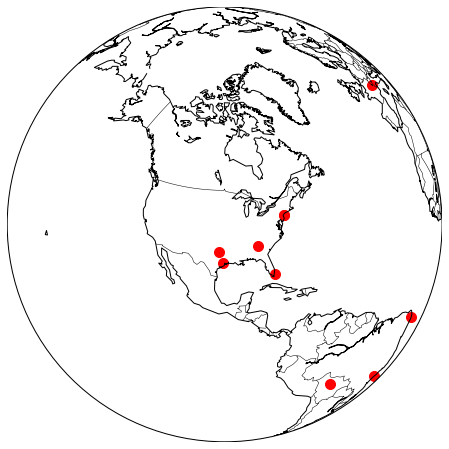

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

data = pd.read_csv(r'solution_2.csv')

print("Headlines: ", data['headline'].count())
print("Countries: ", data['countries'].count())
print("Cities: ", data['cities'].count())
print("  US Cities: ", len([row for key, row in data.iterrows() if not isinstance(row["countrycode"], float) and row["countrycode"] == "US"]))
print("Found Locations: ", data['countrycode'].count())

fig = plt.figure(figsize=(12, 8))
map_plotter = Basemap(projection='ortho',lat_0=40, lon_0=-95)
map_plotter.drawcoastlines()
map_plotter.drawcountries()

drawnCities = []
for key, row in data.head(10).iterrows():
    if not isinstance(row["countrycode"], float) and row["cities"] not in drawnCities:
        drawnCities.append(row["cities"])
        latitude = row["latitude"]
        longitude = row["longitude"]
        map_plotter.scatter([longitude], [latitude], latlon=True, s=100, c='red')

plt.show()